In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.integrate import odeint

a.


0.004004004004004004
1000


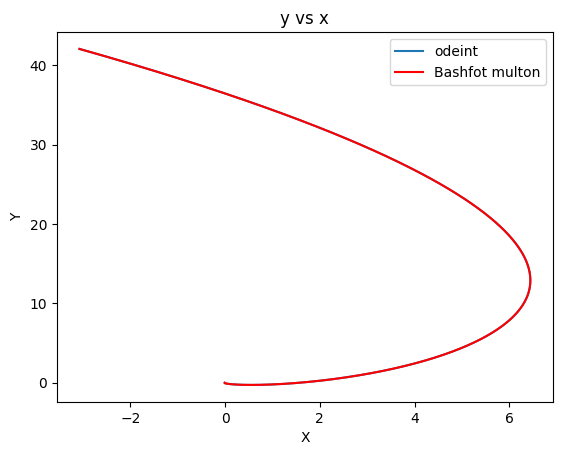

In [56]:
#from os import system
def System(r,t,mu=1.5):

    x,y = r

    dx = 2*x-y
    dy = x+2*y

    return [dx,dy]



def IntegratorAdams(f,r0,t,mu):

    h = t[1] - t[0]
    print(h)

    x = np.zeros_like(t)
    vx = np.zeros_like(t)

    x[0] = r0[0]
    vx[0] = r0[1]

    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)

    for i in range(1,5):
      present = np.array([x[i-1],vx[i-1]])
      K11 = f(present,t[0],mu)
      present = np.array([x[i-1]+0.5*h*K11[0],vx[i-1]+0.5*h*K11[1]])
      K12 = f(present,t[0],mu)
      present = np.array([x[i-1]+0.5*h*K12[0],vx[i-1]+0.5*h*K12[1]])
      K13 = f(present,t[0],mu)
      present = np.array([x[i-1]+h*K13[0],vx[i-1]+h*K13[1]])
      K14 = f(present,t[0],mu)

      # Euler - RK4
      #x[1] = x[0] + h*K11[0]
      #vx[1] = vx[0] + h*K11[1]

      x[i]  = x[i-1] +  (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
      vx[i] = vx[i-1] + (h/6)*(K11[1]+2*K12[1]+2*K13[1]+K14[1])



    xc = x.copy()
    vxc = vx.copy()

    # siendo que uso RK4 comienzo el for desde 4 o desde 5?
    for i in range(5,len(t)):

        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        past_2 = np.array([x[i-3],vx[i-3]])
        past_3 = np.array([x[i-4],vx[i-4]])


        K11 = f(present,t[i-1],mu)
        K12 = f(past,t[i-2],mu)
        K13 = f(past_2,t[i-3],mu)
        K14 = f(past_3,t[i-4],mu)


        #x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        #vx[i] = vx[i-1] + 0.5*h*(3*K11[1]-K12[1])

        x[i] =   x[i-1] + h*((55/24)*K11[0]-(59/24)*K12[0]+(37/24)*K13[0]-(3/8)*K14[0])
        vx[i] = vx[i-1] + h*((55/24)*K11[1]-(59/24)*K12[1]+(37/24)*K13[1]-(3/8)*K14[1])

        ####
        xc[i] = x[i]
        vxc[i] = vx[i]

        # Futuro
        futuro = np.array([x[i],vx[i]])
        K1_f = f(futuro,t[i],mu)

        xc[i] =  xc[i-1] +  h*((251)*K1_f[0]+(646)*K11[0]-(264)*K12[0]+(106)*K13[0]-(19)*K14[0])/720
        vxc[i] = vxc[i-1] + h*((251)*K1_f[1]+(646)*K11[1]-(264)*K12[1]+(106)*K13[1]-(19)*K14[1])/720

    return x,vx,xc,vxc


t = np.linspace(0,4,1000)

r0=[-0.01,-0.01]
soulucion = IntegratorAdams(System,r0,t,1)
x,y,x_m,y_m = soulucion
sol=odeint(System,r0,t)
solx=sol[:,0]
soly=sol[:,1]

#plt.plot(x,y,"r",label="Bashfot multon")
plt.plot(solx,soly,label="odeint")
plt.plot(x,y,"r",label="Bashfot multon")
plt.title('y vs x')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
print(len(t))

1000
1000


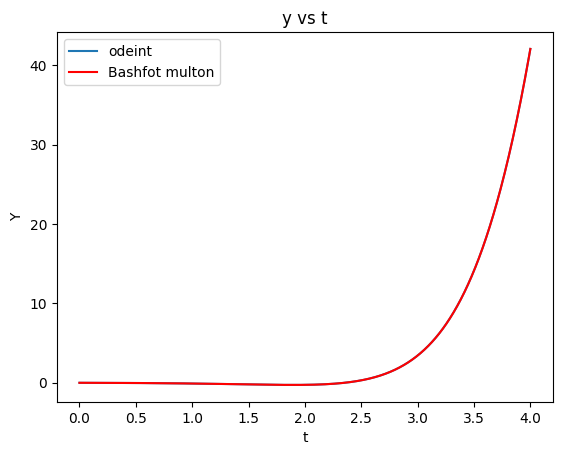

In [57]:
t = np.linspace(0,4,1000)
plt.plot(t,soly,label="odeint")
plt.plot(t,y,"r",label="Bashfot multon")

plt.title('y vs t')
plt.xlabel('t')
plt.ylabel('Y')

plt.legend()

print(len(soly))
print(len(t))

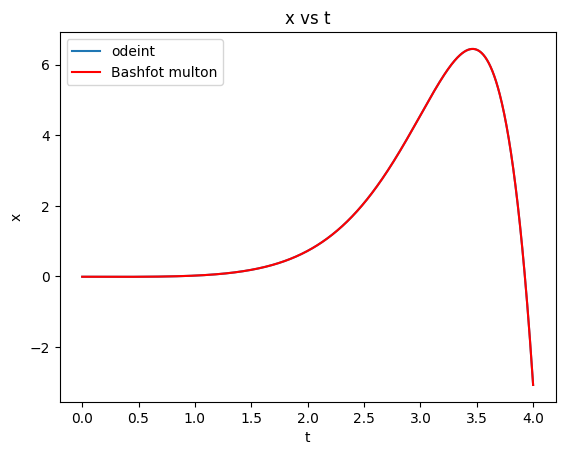

In [58]:
t = np.linspace(0,4,1000)
plt.plot(t,solx,label="odeint")
plt.plot(t,x,"r",label="Bashfot multon")
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')

plt.legend()

b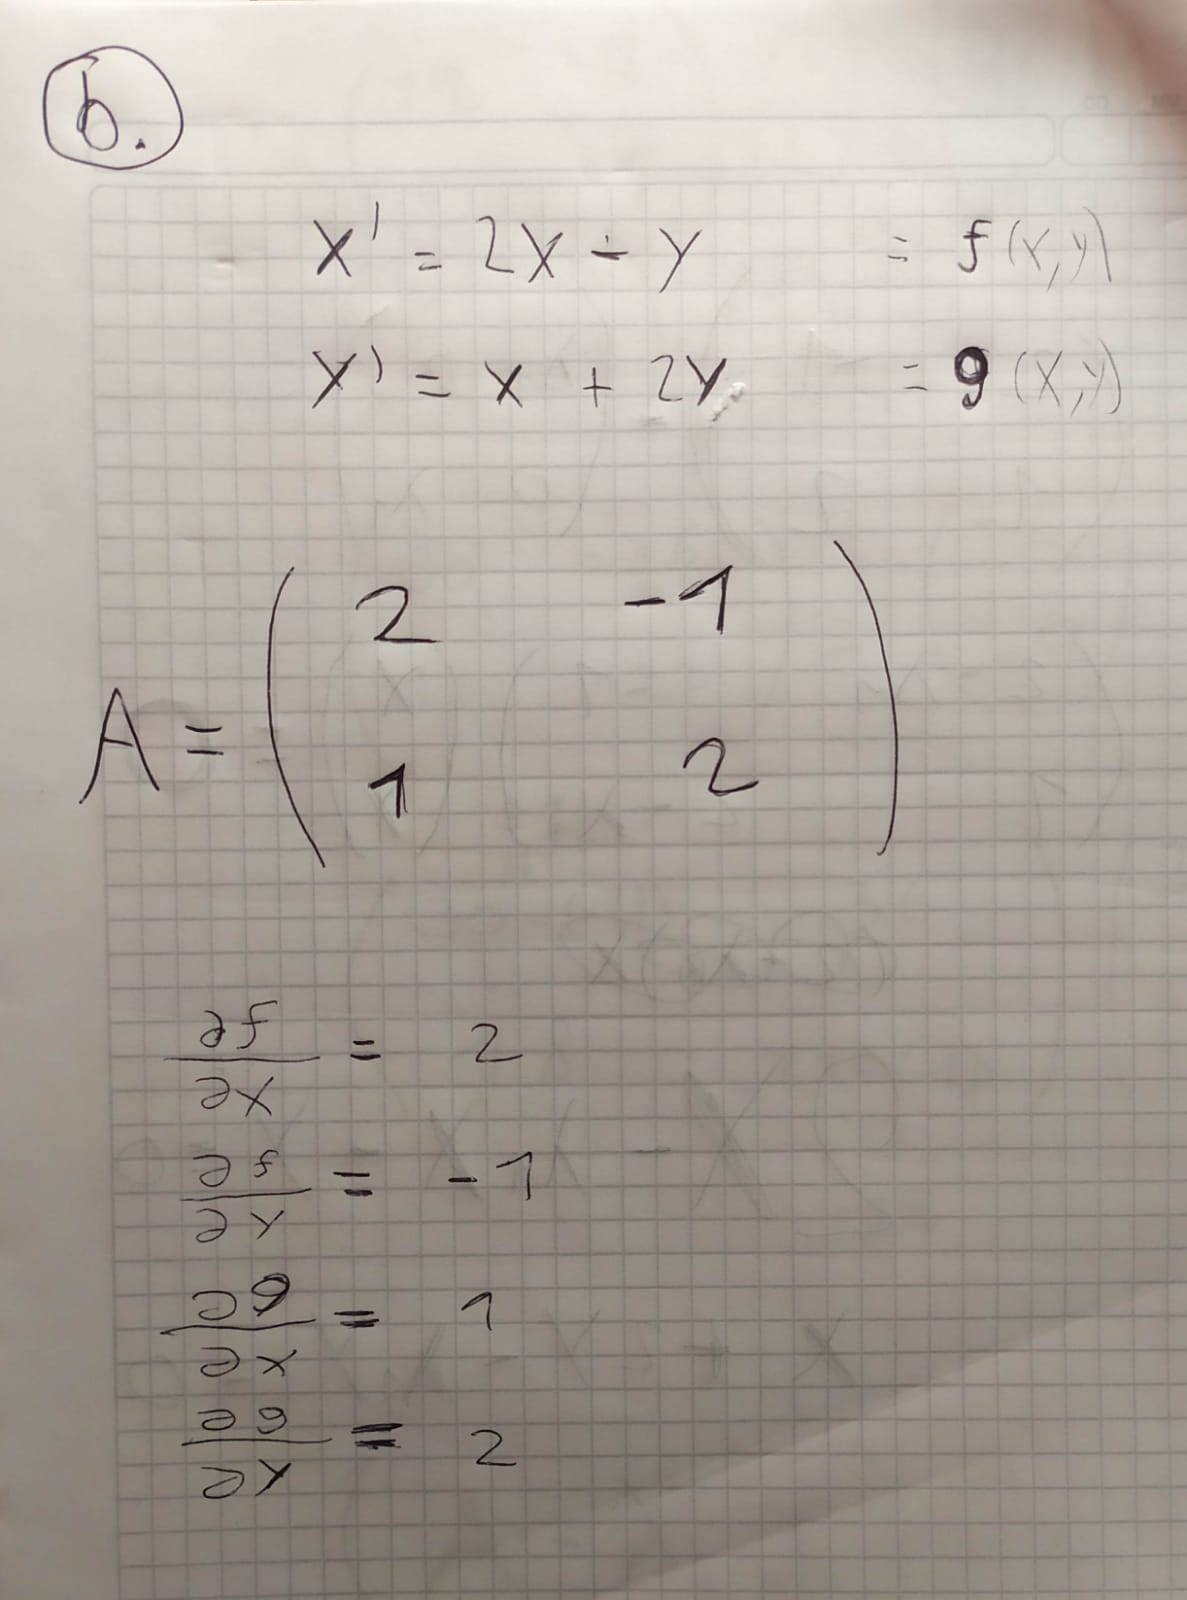.

c.

In [59]:
A = np.array([[2, -1],[1, 2]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("los valores porpios: ",eigenvalues)
print("los vectores porpios: ",eigenvectors)

los valores porpios:  [2.+1.j 2.-1.j]
los vectores porpios:  [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


d.

0.004004004004004004
0.004004004004004004
0.004004004004004004
0.004004004004004004
0.004004004004004004
0.004004004004004004


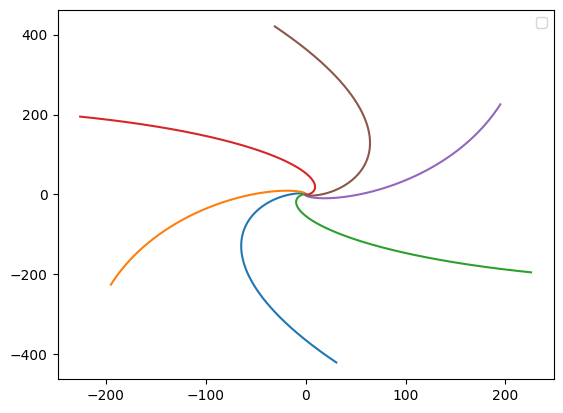

In [60]:
#from os import system
def System(r,t,mu=1.5):

    x,y = r

    dx = 2*x-y
    dy = x+2*y

    return [dx,dy]



def IntegratorAdams(f,r0,t,mu):

    h = t[1] - t[0]
    print(h)

    x = np.zeros_like(t)
    vx = np.zeros_like(t)

    x[0] = r0[0]
    vx[0] = r0[1]

    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)

    for i in range(1,5):
      present = np.array([x[i-1],vx[i-1]])
      K11 = f(present,t[0],mu)
      present = np.array([x[i-1]+0.5*h*K11[0],vx[i-1]+0.5*h*K11[1]])
      K12 = f(present,t[0],mu)
      present = np.array([x[i-1]+0.5*h*K12[0],vx[i-1]+0.5*h*K12[1]])
      K13 = f(present,t[0],mu)
      present = np.array([x[i-1]+h*K13[0],vx[i-1]+h*K13[1]])
      K14 = f(present,t[0],mu)

      # Euler - RK4
      #x[1] = x[0] + h*K11[0]
      #vx[1] = vx[0] + h*K11[1]

      x[i]  = x[i-1] +  (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
      vx[i] = vx[i-1] + (h/6)*(K11[1]+2*K12[1]+2*K13[1]+K14[1])



    xc = x.copy()
    vxc = vx.copy()

    # siendo que uso RK4 comienzo el for desde 4 o desde 5?
    for i in range(5,len(t)):

        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        past_2 = np.array([x[i-3],vx[i-3]])
        past_3 = np.array([x[i-4],vx[i-4]])


        K11 = f(present,t[i-1],mu)
        K12 = f(past,t[i-2],mu)
        K13 = f(past_2,t[i-3],mu)
        K14 = f(past_3,t[i-4],mu)


        #x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        #vx[i] = vx[i-1] + 0.5*h*(3*K11[1]-K12[1])

        x[i] =   x[i-1] + h*((55/24)*K11[0]-(59/24)*K12[0]+(37/24)*K13[0]-(3/8)*K14[0])
        vx[i] = vx[i-1] + h*((55/24)*K11[1]-(59/24)*K12[1]+(37/24)*K13[1]-(3/8)*K14[1])

        ####
        xc[i] = x[i]
        vxc[i] = vx[i]

        # Futuro
        futuro = np.array([x[i],vx[i]])
        K1_f = f(futuro,t[i],mu)

        xc[i] =  xc[i-1] +  h*((251)*K1_f[0]+(646)*K11[0]-(264)*K12[0]+(106)*K13[0]-(19)*K14[0])/720
        vxc[i] = vxc[i-1] + h*((251)*K1_f[1]+(646)*K11[1]-(264)*K12[1]+(106)*K13[1]-(19)*K14[1])/720

    return x,vx,xc,vxc

#t = np.linspace(0,5,10000)


r0 = [0.1,0.1]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

r0 = [0.1,0.]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

r0 = [0,0.1]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

r0 = [0,-0.1]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

r0 = [-0.1,0]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

r0 = [-0.1,-0.1]
x,y,x_1,y_1=IntegratorAdams(System,r0,t,1)
plt.plot(x_1,y_1)

plt.legend()

El punto critico lo vemos en (0,0)